## Developing Linear regression model mathematically

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [23]:
x=np.array([3.4, 1.8, 4.6, 2.3, 3.1, 5.5, 7.0, 3.0, 2.6, 4.3, 2.1, 1.1, 6.1, 4.8, 3.8])
y=np.array([26.2, 17.8, 31.3, 23.1, 27.5, 36.0, 14.1, 23.3, 19.6, 31.3, 24.0, 17.3,43.2, 36.4, 26.1])
n=len(x)
x_mean=0
y_mean=0
for i in range(0,n):
    x_mean=x_mean+x[i]
    y_mean=y_mean+y[i]
x_mean=x_mean/n
y_mean=y_mean/n
numerator=0
dinom=0
for i in range(0,n):
    numerator=(x[i]-x_mean)*(y[i]-y_mean)+numerator
    dinom=dinom+ ((x[i]-x_mean)*(x[i]-x_mean))
b=numerator/dinom
a=y_mean-(b*x_mean)
print(b)
print(a)
print(x_mean)
print(y_mean)
print(dinom)

2.361139369277721
17.743784333672437
3.7
26.480000000000004
39.32


In [5]:
len(y)

15

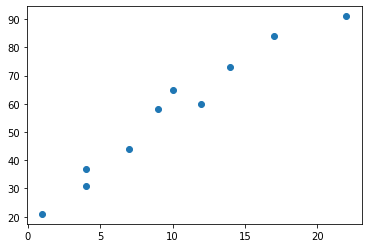

In [10]:
plt.scatter(x,y)

In [6]:
#y cap
y_pred=a+(b * x)      # fitting the model
print(y_pred)


[25.77165819 21.9938352  28.60502543 23.17440488 25.06331638 30.73005086
 34.27175992 24.82720244 23.88274669 27.89668362 22.70217701 20.34103764
 32.14673449 29.07725331 26.71611394]


In [8]:
#error                                        # mean error
made=0
for i in range(0,n):
    print(((y[i]-y_mean)*(y[i]-y_mean)))
    made += ((y[i]-y_mean)*(y[i]-y_mean))
made

0.07840000000000262
75.34240000000005
23.23239999999997
11.424400000000018
1.0403999999999918
90.63039999999992
153.2644000000001
10.11240000000002
47.33440000000004
23.23239999999997
6.15040000000002
84.27240000000006
279.55839999999995
98.40639999999989
0.14440000000000194


904.224

In [10]:
                                                  # error from predicted values
sse=0
for i in range(0,n):
    print(((y[i]-y_pred[i])*(y[i]-y_pred[i])))
    sse += ((y[i]-y_pred[i])*(y[i]-y_pred[i]))
sse

0.18347670686512677
17.58825367110671
7.262887920280554
0.00553608661590951
5.937427071611066
27.772363888650258
406.89989821430237
2.3323472973406574
18.341919243207816
11.582562371712783
1.6843445155641708
9.247909927154339
122.17467851708966
53.622619141478275
0.3795963832766421


685.0158209562563

In [21]:
import math
ssr= made-sse
explained_variance = ssr/made  
print(ssr)
print(explained_variance)
print(math.sqrt(explained_variance) )        # correlation cefficient

219.2081790437437
0.24242685335021377
0.4923686153180499


In [12]:
s=pd.DataFrame(x,y).reset_index()
s.corr()

,index,0
index,1.000000,0.492369
0,0.492369,1.000000


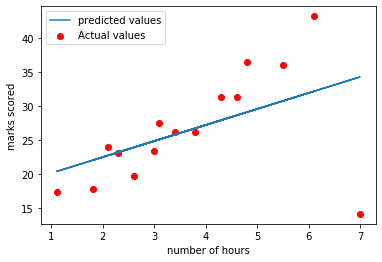

In [22]:
plt.scatter(x,y,color='red',label='Actual values')
plt.plot(x,y_pred,label='predicted values')
plt.xlabel('number of hours')
plt.ylabel('marks scored')
plt.legend()

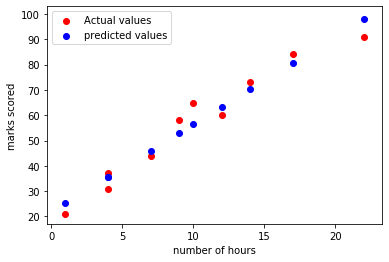

In [46]:
plt.scatter(x,y,color='red',label='Actual values')
plt.scatter(x,y_pred,color='blue',label='predicted values')
plt.xlabel('number of hours')
plt.ylabel('marks scored')
plt.legend()

In [13]:
#residue:
r=y-y_pred
print(r)

[  0.42834181  -4.1938352    2.69497457  -0.07440488   2.43668362
   5.26994914 -20.17175992  -1.52720244  -4.28274669   3.40331638
   1.29782299  -3.04103764  11.05326551   7.32274669  -0.61611394]


In [14]:
print(sum(abs(r)))                  #some of residue error-- absolute value

67.81420142421157


In [15]:
rmse=np.sqrt(sum(r**2)/n)             #root mean square error
rmse

6.757789682809295

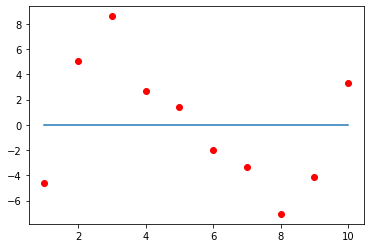

In [58]:
x_axis=[i for i in range(1,n+1)]                     # residue plot
plt.scatter(x_axis,r,color='red')
plt.plot(x_axis,[0]*n)

In [62]:
data=pd.read_csv('headbrain.csv')
data.head(4)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282


In [17]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from  sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

In [75]:
x=data['Head Size(cm^3)'].values
y=data['Brain Weight(grams)'].values
n=len(x)
x=x.reshape(n,1)    # as a column vector

In [19]:
n=len(x)
x=x.reshape(n,1)  
reg=LinearRegression()
reg = reg.fit(x,y)
print(reg.coef_)
print(reg.intercept_)

[2.36113937]
17.743784333672437


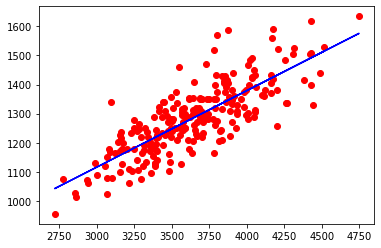

In [80]:
#model
y_pred=reg.predict(x)
plt.scatter(x,y,color='red')
plt.plot(x,y_pred,color='blue')

In [20]:
#model evaluation
from sklearn.metrics import r2_score

rmse= np.sqrt(mean_squared_error(y,y_pred))
r2=r2_score(y,y_pred)          # R squared value

print(rmse)
print(r2)

6.757789682809295
0.24242685335021374
